In [1]:
#!pip install -U dhlab
import os 
import datetime as dt
import pandas as pd

import dhlab as dh
from sentiment import load_corpus_from_file, compute_sentiment_analysis, add_urls

wordcloud er ikke installert, kan ikke lage ordskyer


# Sentimentanalyse i aviskorpus

1. Angi nøkkelord
2. [Hent inn korpus](#korpusdefinisjon)
3. [Score sentiment for forekomster av et ord](#sentimentscore) 
4. [Lagre resultater i CSV-fil](#lagre-data)

In [1]:
# INPUT KREVES
word = "biblioteket"    # Nøkkelord som skal forekomme i tekstene

## Korpusdefinisjon

**Fyll inn filsti** til lokal csv- eller excel-fil med korpusdefinisjon:


In [2]:
# INPUT KREVES
file_path = "FYLL INN"

Eventuelt **definer et korpus**  direkte med parametere.

In [3]:
# INPUT KREVES
city="Kristiansand"     # Publiseringssted for avisene
from_year=2000          # Start for tidsperiode det søkes i
to_year=2022            # Slutt for tidsperiode
number_of_docs=10000    # Maks antall dokumenter i tekstutvalget

In [4]:
# corpus-variabelen peker til korpusdefinisjonen, som et dhlab.Corpus-objekt

if os.path.exists(file_path):
    corpus = load_corpus_from_file(file_path)

    print("Lastet corpus fra fil: ", file_path)
else:
    corpus = dh.Corpus(
        doctype="digavis", 
        fulltext=word, 
        freetext=f"city: {city}",
        from_year=from_year,
        to_year = to_year,
        limit=number_of_docs
    )

    print("Lastet corpus fra parametere: ")
    print(f"Aviser, utgitt mellom {from_year} og {to_year} i {city}, der ordet \"{word}\" forekommer.")

print(f"corpus består av {corpus.size} utgivelser")


Lastet corpus fra parametere: 
Aviser, utgitt mellom 2000 og 2022 i Kristiansand, der ordet "biblioteket" forekommer.
corpus består av 3441 utgivelser


**Valgfritt:** Sett `save_to_file=True` hvis du vil lagre resulterende korpus til en ny, datostemplet CSV-fil

In [5]:
# INPUT KREVES
save_to_file=True       # Hvorvidt tekstutvalget skal lagres som CSV-fil, til senere bruk

if save_to_file:
    new_file_path = f"corpus_avis_{corpus.frame.year.min()}_{corpus.frame.year.max()}_{city}_{word}_created{dt.date.today()}.csv"
    corpus.to_csv(new_file_path)

## Sentimentscore

Kontekstene der nøkkelordet forekommer hentes ut fra korpuset, og vi beregner er sentimentscore på hvert tekstutdrag.

Det er en enkel analyse, med positive og negative ordlister: Vi regner ut differansen mellom summene av positive og negative ord i konteksten.

Ordlistene vi bruker her, NorSentLex, er utviklet av LTG-gruppen ved UiO ifm. SANT-prosjektet. 

In [6]:
# Beregn en sentimentscore til kontekstene der nøkkelordet forekommer.
result = compute_sentiment_analysis(corpus, word)

In [7]:
result


,dhlabid,urn,title,city,timestamp,year,doctype,word,count,positive,negative,sentimentscore
0,200272007,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080109,2008,digavis,biblioteket,4,1,0,1
1,200272007,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080109,2008,digavis,biblioteket,4,2,0,2
2,200272007,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080109,2008,digavis,biblioteket,4,1,0,1
3,200272007,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080109,2008,digavis,biblioteket,4,1,1,0
4,200272008,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080116,2008,digavis,biblioteket,2,0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...
5577,200486868,URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...,faedrelandsvennen,Kristiansand,20200221,2020,digavis,biblioteket,3,0,2,-2
5578,200486868,URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...,faedrelandsvennen,Kristiansand,20200221,2020,digavis,biblioteket,3,1,3,-2
5579,200486868,URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...,faedrelandsvennen,Kristiansand,20200221,2020,digavis,biblioteket,3,2,1,1
5580,200486869,URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...,faedrelandsvennen,Kristiansand,20200222,2020,digavis,biblioteket,1,0,2,-2


### Tilbakekobling fra datapunkt til kildetekst: 
URNene i datarammen er referanser til de scannede dokumentene. 
Ved å bytte ut "URN" i følgende adresse med en reell verdi kan du lese avisen i nettbiblioteket ([nb.no](https://nb.no)): `https://www.nb.no/items/`URN

f.eks. https://www.nb.no/items/URN:NBN:no-nb_digavis_kristiansandavis_null_null_20100204_4_5_1


Vi har også en funksjon som konstruerer URLene  og lagrer dem til en ny kolonne i datarammen. Outputet fra kodeblokken under må kopieres og limes inn i nettleseren.


In [8]:
row_number = 1  # Endre radnummeret etter eget ønske

result = add_urls(result)
print(result.url[row_number])

https://www.nb.no/items/URN:NBN:no-nb_digavis_budstikkasoegne_null_null_20080109_10_1_1?searchText=biblioteket


In [9]:
result

,dhlabid,urn,title,city,timestamp,year,doctype,word,count,positive,negative,sentimentscore,url
0,200272007,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080109,2008,digavis,biblioteket,4,1,0,1,https://www.nb.no/items/URN:NBN:no-nb_digavis_...
1,200272007,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080109,2008,digavis,biblioteket,4,2,0,2,https://www.nb.no/items/URN:NBN:no-nb_digavis_...
2,200272007,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080109,2008,digavis,biblioteket,4,1,0,1,https://www.nb.no/items/URN:NBN:no-nb_digavis_...
3,200272007,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080109,2008,digavis,biblioteket,4,1,1,0,https://www.nb.no/items/URN:NBN:no-nb_digavis_...
4,200272008,URN:NBN:no-nb_digavis_budstikkasoegne_null_nul...,budstikkasoegne,Kristiansand,20080116,2008,digavis,biblioteket,2,0,2,-2,https://www.nb.no/items/URN:NBN:no-nb_digavis_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5577,200486868,URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...,faedrelandsvennen,Kristiansand,20200221,2020,digavis,biblioteket,3,0,2,-2,https://www.nb.no/items/URN:NBN:no-nb_digavis_...
5578,200486868,URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...,faedrelandsvennen,Kristiansand,20200221,2020,digavis,biblioteket,3,1,3,-2,https://www.nb.no/items/URN:NBN:no-nb_digavis_...
5579,200486868,URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...,faedrelandsvennen,Kristiansand,20200221,2020,digavis,biblioteket,3,2,1,1,https://www.nb.no/items/URN:NBN:no-nb_digavis_...
5580,200486869,URN:NBN:no-nb_digavis_faedrelandsvennen_null_n...,faedrelandsvennen,Kristiansand,20200222,2020,digavis,biblioteket,1,0,2,-2,https://www.nb.no/items/URN:NBN:no-nb_digavis_...



## Visualiser resultatet


<AxesSubplot: xlabel='year'>

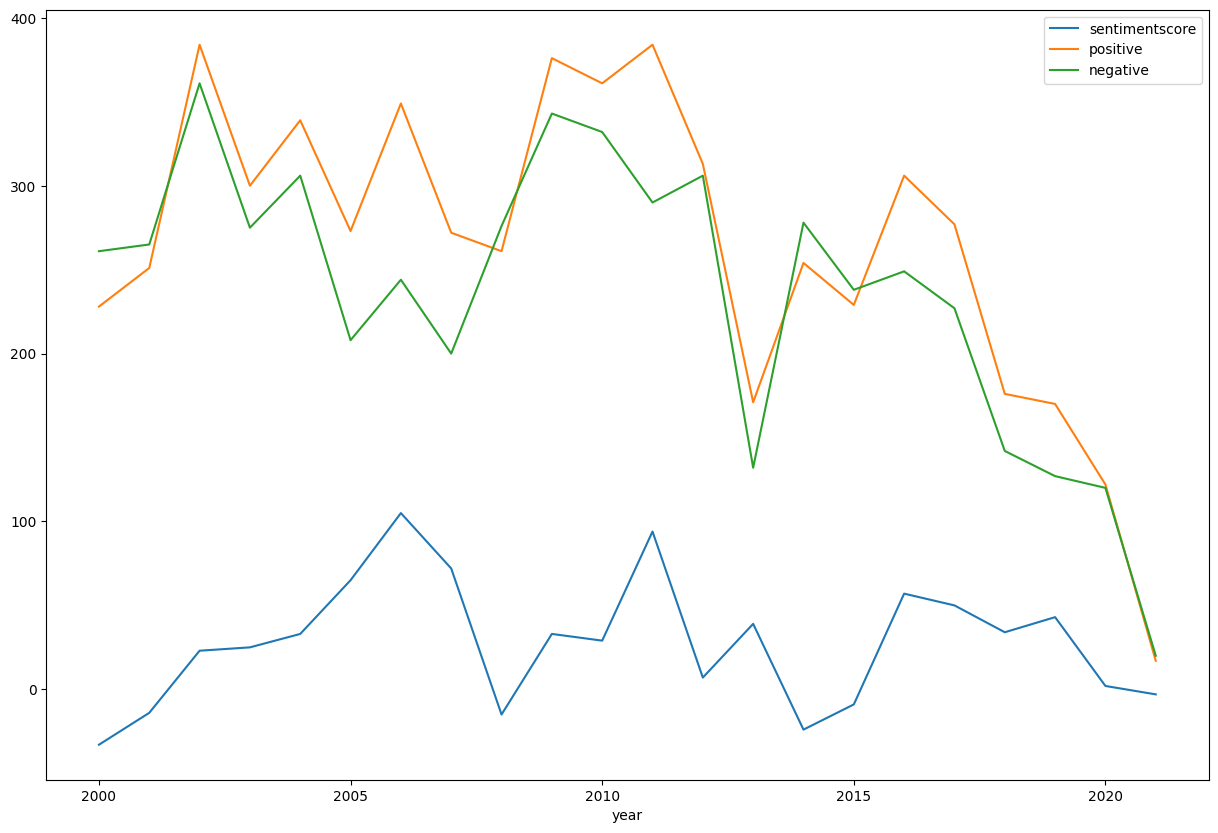

In [10]:
r = result[["year","positive", "negative", "sentimentscore"]]
rgroup = r.groupby("year")[["sentimentscore", "positive", "negative"]].sum() 
rgroup.plot()

##  Lagre data 

**Skriv utdata** til en CSV-fil på ditt lokale filsystem:

| Kolonne | Beskrivelse |
| --- | --- |
| dhlabid | DH-labens ID-nummer for det digitale tekstobjektet (OCR-scannet tekst) i databasene |
| urn | Unique Resource Name (digitalt bilde av tekstdokumentet, tilgjengelig i nettbiblioteket) |
| title |  Avistittel, navn på publikasjon |
| city  | Publiseringssted (oftest en by) |
| timestamp  | datostempel i ISO-format (YYYYMMDD) |
| year | årstall for publikasjonen |
| doctype | Dokumenttype (her er det bare aviser, "digavis") |
| word | nøkkelord i tekstutdragene (konkordansene) som sentimentanalysen ble utført på
| count | ordfrekvens: antall ganger nøkkelordet forekommer i den gitte avisutgivelsen |
| positive | antall positive ord i kontekstene nøkkelordet forekommer i |
| negative | antall negative ord i kontekstene |
| sentimentscore  | differansen positiv score - negativ score |
| url | lenke til avisen i nettbiblioteket, inkl. søk på nøkkelordet |


In [11]:
outputfile = f"sentimentanalyse_aviskorpus_{from_year}-{to_year}_{dt.date.today()}.csv"
result.to_csv(outputfile)